# Using CNN  on a small MNIST data set

In this script we build a small CNN with 1 convolutional layer and 1 dense layer. Like in the experiments with the fully connected NN with MNIST that we performed last time, we use again a small data with only 4000 images in the training data set so that the NN can be trained on the CPU.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as imgplot
import numpy as np

import time
import tensorflow as tf
tf.set_random_seed(1)

from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, BatchNormalization
from keras.layers import Convolution2D, MaxPooling2D, Flatten
import keras
import sys
print ("Keras {} TF {} Python {}".format(keras.__version__, tf.__version__, sys.version_info))



C:\Users\Daniel\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Keras 2.1.5 TF 1.2.1 Python sys.version_info(major=3, minor=6, micro=4, releaselevel='final', serial=0)


In [3]:
# To be compatible with python3 and python2
try:
    import cPickle as pickle
except ImportError:
    import pickle
import gzip

with gzip.open('../data/mnist_4000.pkl.gz', 'rb') as f:
    if sys.version_info.major > 2:
        (X,y) = pickle.load(f, encoding='latin1')
    else:
        (X,y) = pickle.load(f)
PIXELS = len(X[0,0,0,:])

print(X.shape, y.shape, PIXELS) #As read
# We need to reshape for the MLP
X = X.reshape([4000, 784])
np.shape(X)

(4000, 1, 28, 28) (4000,) 28


(4000, 784)

In [4]:
X_train=X[0:2400]
Y_train=y[0:2400]
X_val=X[2400:3000]
Y_val=y[2400:3000]


In [5]:
X_train=np.reshape(X_train, (2400,28,28,1))
X_val=np.reshape(X_val, (600,28,28,1))
print(X_train.shape)
print(X_val.shape)

(2400, 28, 28, 1)
(600, 28, 28, 1)


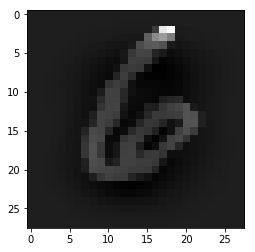

In [6]:
plt.imshow(X_train[13,:,:,0],cmap="gray")

In [7]:
def convertToOneHot(vector, num_classes=None):
    result = np.zeros((len(vector), num_classes), dtype='float32')
    result[np.arange(len(vector)), vector] = 1
    return result
print("class label")
print(Y_train[0:5])
print("class label in OneHot encodig")
print(convertToOneHot(Y_train[0:5], 10))

class label
[5 0 4 1 9]
class label in OneHot encodig
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [8]:
Y_train=convertToOneHot(Y_train,num_classes=10)
print(Y_train.shape)
Y_val=convertToOneHot(Y_val,num_classes=10)
print(Y_val.shape)

(2400, 10)
(600, 10)


In [9]:
# here we center and standardize the data
X_mean = np.mean( X_train, axis = 0)
X_std = np.std( X_train, axis = 0)

X_train = (X_train - X_mean ) / (X_std + 0.0001)
X_val = (X_val - X_mean ) / (X_std + 0.0001)

In [10]:
### First model with a convolutional layer
name = 'cnn1'
model = Sequential()
# this applies 32 convolution filters of size 3x3 each.

model.add(Convolution2D(32, 3, 3, border_mode='same', input_shape=(28, 28, 1)))
model.add(Activation('relu'))

model.add(Flatten())

model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

C:\Users\Daniel\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1..., padding="same")`
  


In [11]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                250890    
_________________________________________________________________
activation_2 (Activation)    (None, 10)                0         
Total params: 251,210
Trainable params: 251,210
Non-trainable params: 0
_________________________________________________________________


In [12]:
tensorboard = keras.callbacks.TensorBoard(
        log_dir='tensorboard/mnist/' + name + '/', 
        write_graph=True,
        histogram_freq=1)

In [13]:
history=model.fit(X_train, Y_train, 
                  batch_size=128, 
                  nb_epoch=6,
                  verbose=1, 
                  validation_data=(X_val, Y_val),
                  callbacks=[tensorboard])

C:\Users\Daniel\Anaconda3\lib\site-packages\keras\models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 2400 samples, validate on 600 samples
Epoch 1/6
2400/2400 [==============================] - 1s 621us/step - loss: 0.8873 - acc: 0.7425 - val_loss: 0.5648 - val_acc: 0.8567
Epoch 2/6
2400/2400 [==============================] - 1s 600us/step - loss: 0.2984 - acc: 0.9104 - val_loss: 0.5191 - val_acc: 0.8933
Epoch 3/6
2400/2400 [==============================] - 2s 651us/step - loss: 0.1914 - acc: 0.9492 - val_loss: 0.4856 - val_acc: 0.9117
Epoch 4/6
2400/2400 [==============================] - 1s 572us/step - loss: 0.1384 - acc: 0.9667 - val_loss: 0.4629 - val_acc: 0.9133
Epoch 5/6
2400/2400 [==============================] - 1s 602us/step - loss: 0.0970 - acc: 0.9792 - val_loss: 0.4510 - val_acc: 0.9117
Epoch 6/6
2400/2400 [==============================] - 1s 578us/step - loss: 0.0744 - acc: 0.9862 - val_loss: 0.4557 - val_acc: 0.9133


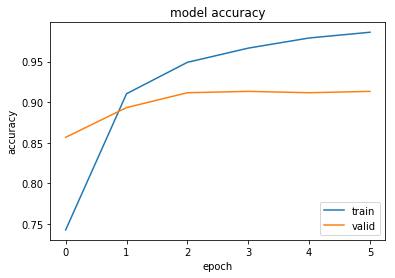

In [14]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='lower right')
plt.show()

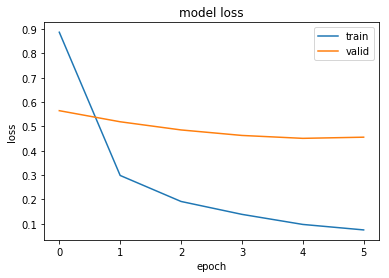

In [15]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper right')
plt.show()

In [ ]:
#!tensorboard --logdir=tensorboard/tensorboard/mnist/